# Importing Necessary Libraries

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading the Data

In [123]:
train = pd.read_csv("drive/MyDrive/Churn_Modelling.csv")

# Data Preprocessing

In [124]:
pd.options.display.max_columns = None
print('Top 5 rows of the dataset\n', train.head())
print('Bottom 5 rows of the dataset\n', train.tail())
print(train.info())
print(train.describe())
print('Checking for null values in the dataset:\n',train.isnull().sum())
print(f'Shape of Train dataset: {train.shape}')

Top 5 rows of the dataset
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826

In [125]:
cols_to_drop = ['Surname', 'RowNumber', 'CustomerId']
data = train.drop(columns=cols_to_drop, axis=1)
# Since the dataset is small so we won't remove labels anymore.

In [126]:
# Checking and removing the duplicate data points.
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

0
0


In [127]:
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Data Visualization

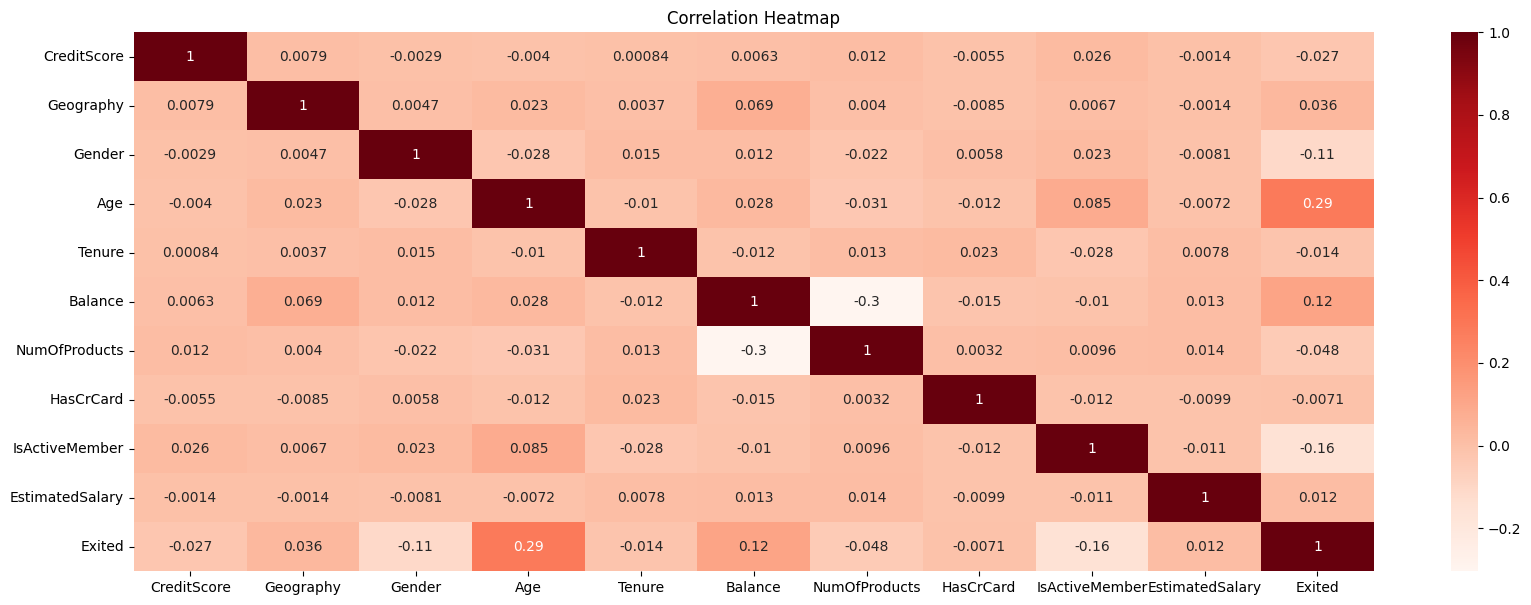

In [128]:
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

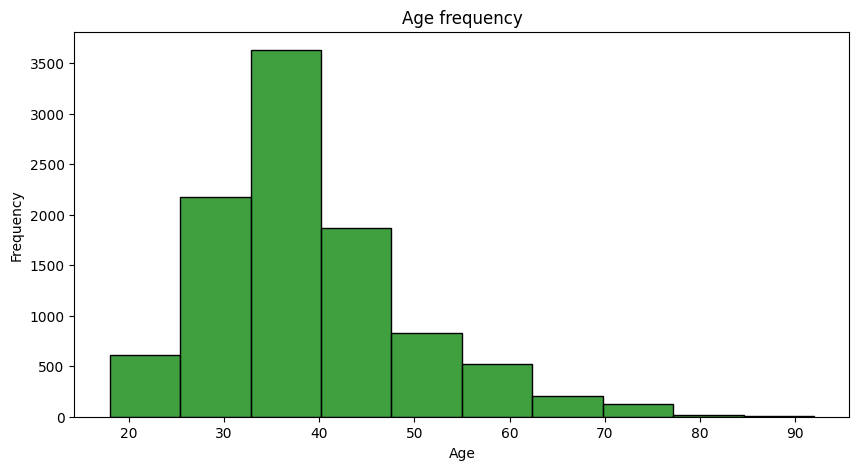

In [129]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=10, color='Green')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age frequency")
plt.show()

<ipython-input-130-f8e0f5af32dd>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Balance'], shade=True, color='blue', label='Exited')


Text(0.5, 1.0, 'Churned Customers by Balance Distribution')

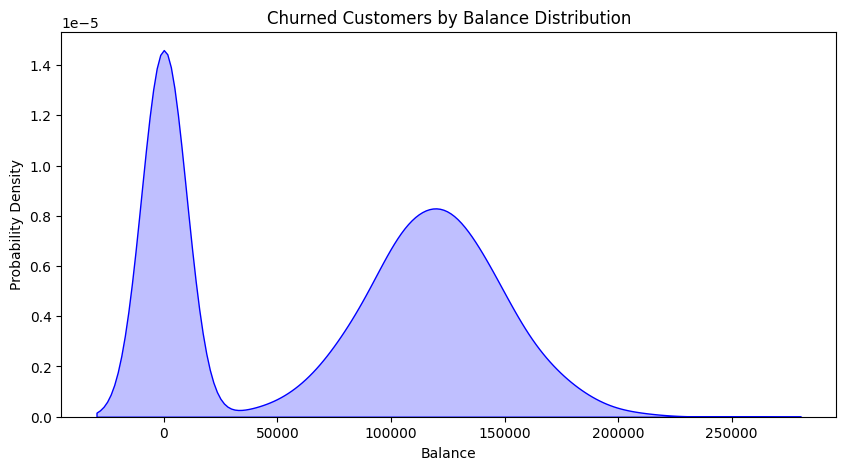

In [130]:
# This plot shows the probability density of customers who may churn based on the amount in their bank accounts.
# From the plot, it is evident that customers with low balances in their accounts are more likely to churn.
plt.figure(figsize=(10, 5))
sns.kdeplot(data['Balance'], shade=True, color='blue', label='Exited')
plt.xlabel('Balance')
plt.ylabel('Probability Density')
plt.title("Churned Customers by Balance Distribution")

Text(0.5, 1.0, 'Geographical Influence on Customer Churn Status')

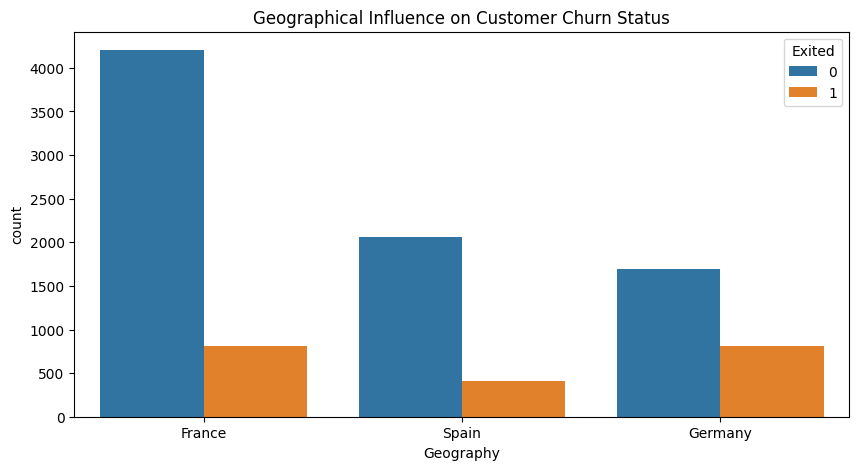

In [131]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, hue="Exited", x='Geography')
plt.title("Geographical Influence on Customer Churn Status")

# Splitting the Data

In [132]:
X_data = data.drop('Exited', axis=1)
Y_data = data['Exited']

In [133]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_data, test_size=0.2, random_state=42)

# Model Training and Evaluation

In [135]:
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
scores = cross_val_score(model, X_train, Y_train, scoring='f1', cv=10, n_jobs=-1)
print(f'F1 score using Cross Validator: {np.mean(scores):.4f}')

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

[[1547   60]
 [ 209  184]]
Accuracy: 0.8655
F1 score using Cross Validator: 0.5714


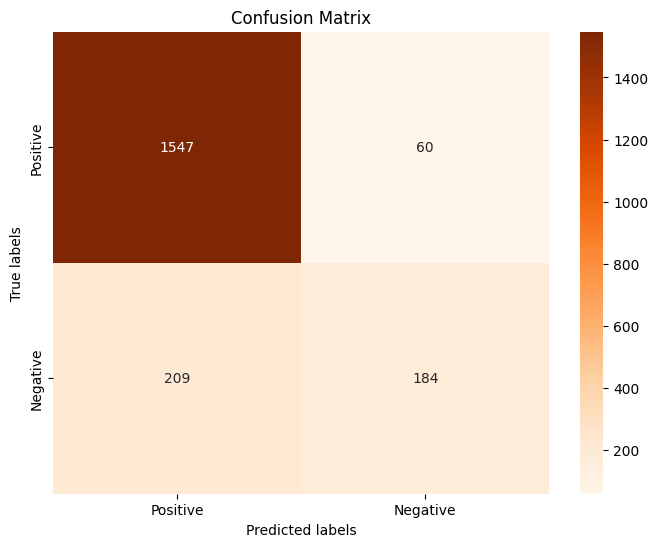

In [136]:
labels = ['Positive', 'Negative']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [137]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, Y_train)

Y_pred = forest_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
scores = cross_val_score(forest_model, X_train, Y_train, scoring='f1', cv=10, n_jobs=-1)
print(f'F1 score using Cross Validator: {np.mean(scores):.4f}')

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000

[[1551   56]
 [ 207  186]]
Accuracy: 0.8685
F1 score using Cross Validator: 0.5713


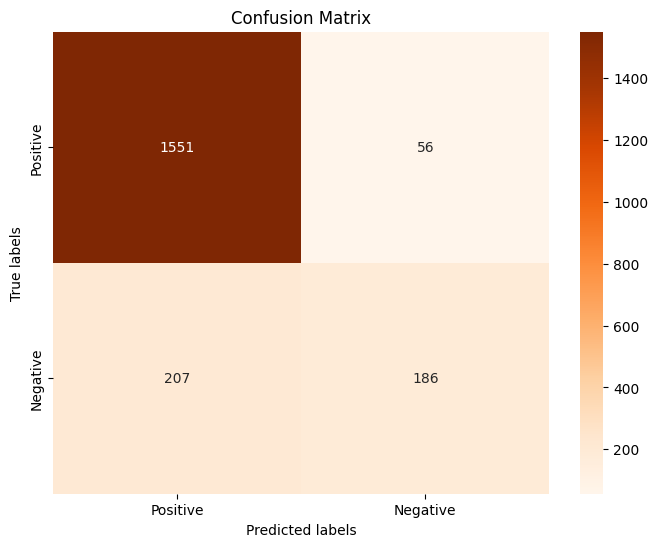

In [138]:
labels = ['Positive', 'Negative']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [139]:
linear_model = LogisticRegression()
linear_model.fit(X_train, Y_train)

Y_pred = linear_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
scores = cross_val_score(linear_model, X_train, Y_train, scoring='f1', cv=10, n_jobs=-1)
print(f'F1 score using Cross Validator: {np.mean(scores):.4f}')

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

[[1559   48]
 [ 322   71]]
Accuracy: 0.815
F1 score using Cross Validator: 0.2745


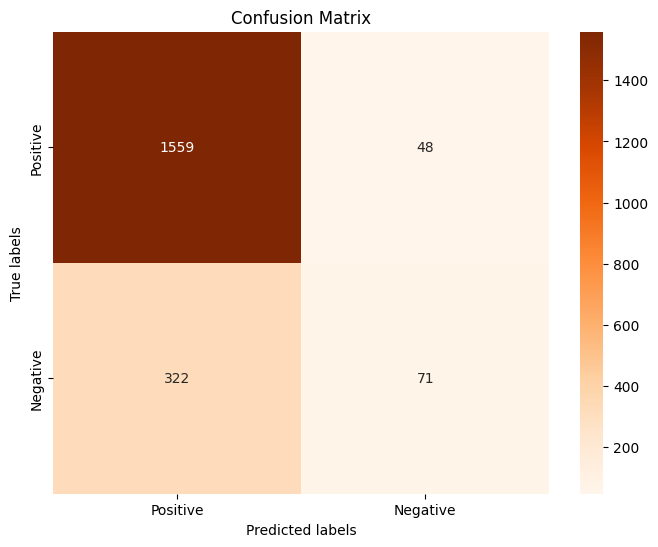

In [140]:
labels = ['Positive', 'Negative']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()